In [1]:
import os

%matplotlib notebook

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
from lsst.timelines import read_activities, show_activities, write_activities, get_data_dir

#### Read and display a set of activities

You can also build the activities in code (see next cell).  The CSV starts with three rows of Milestone-related
information which I won't display (`activities[3:]`)

<IPython.core.display.Javascript object>


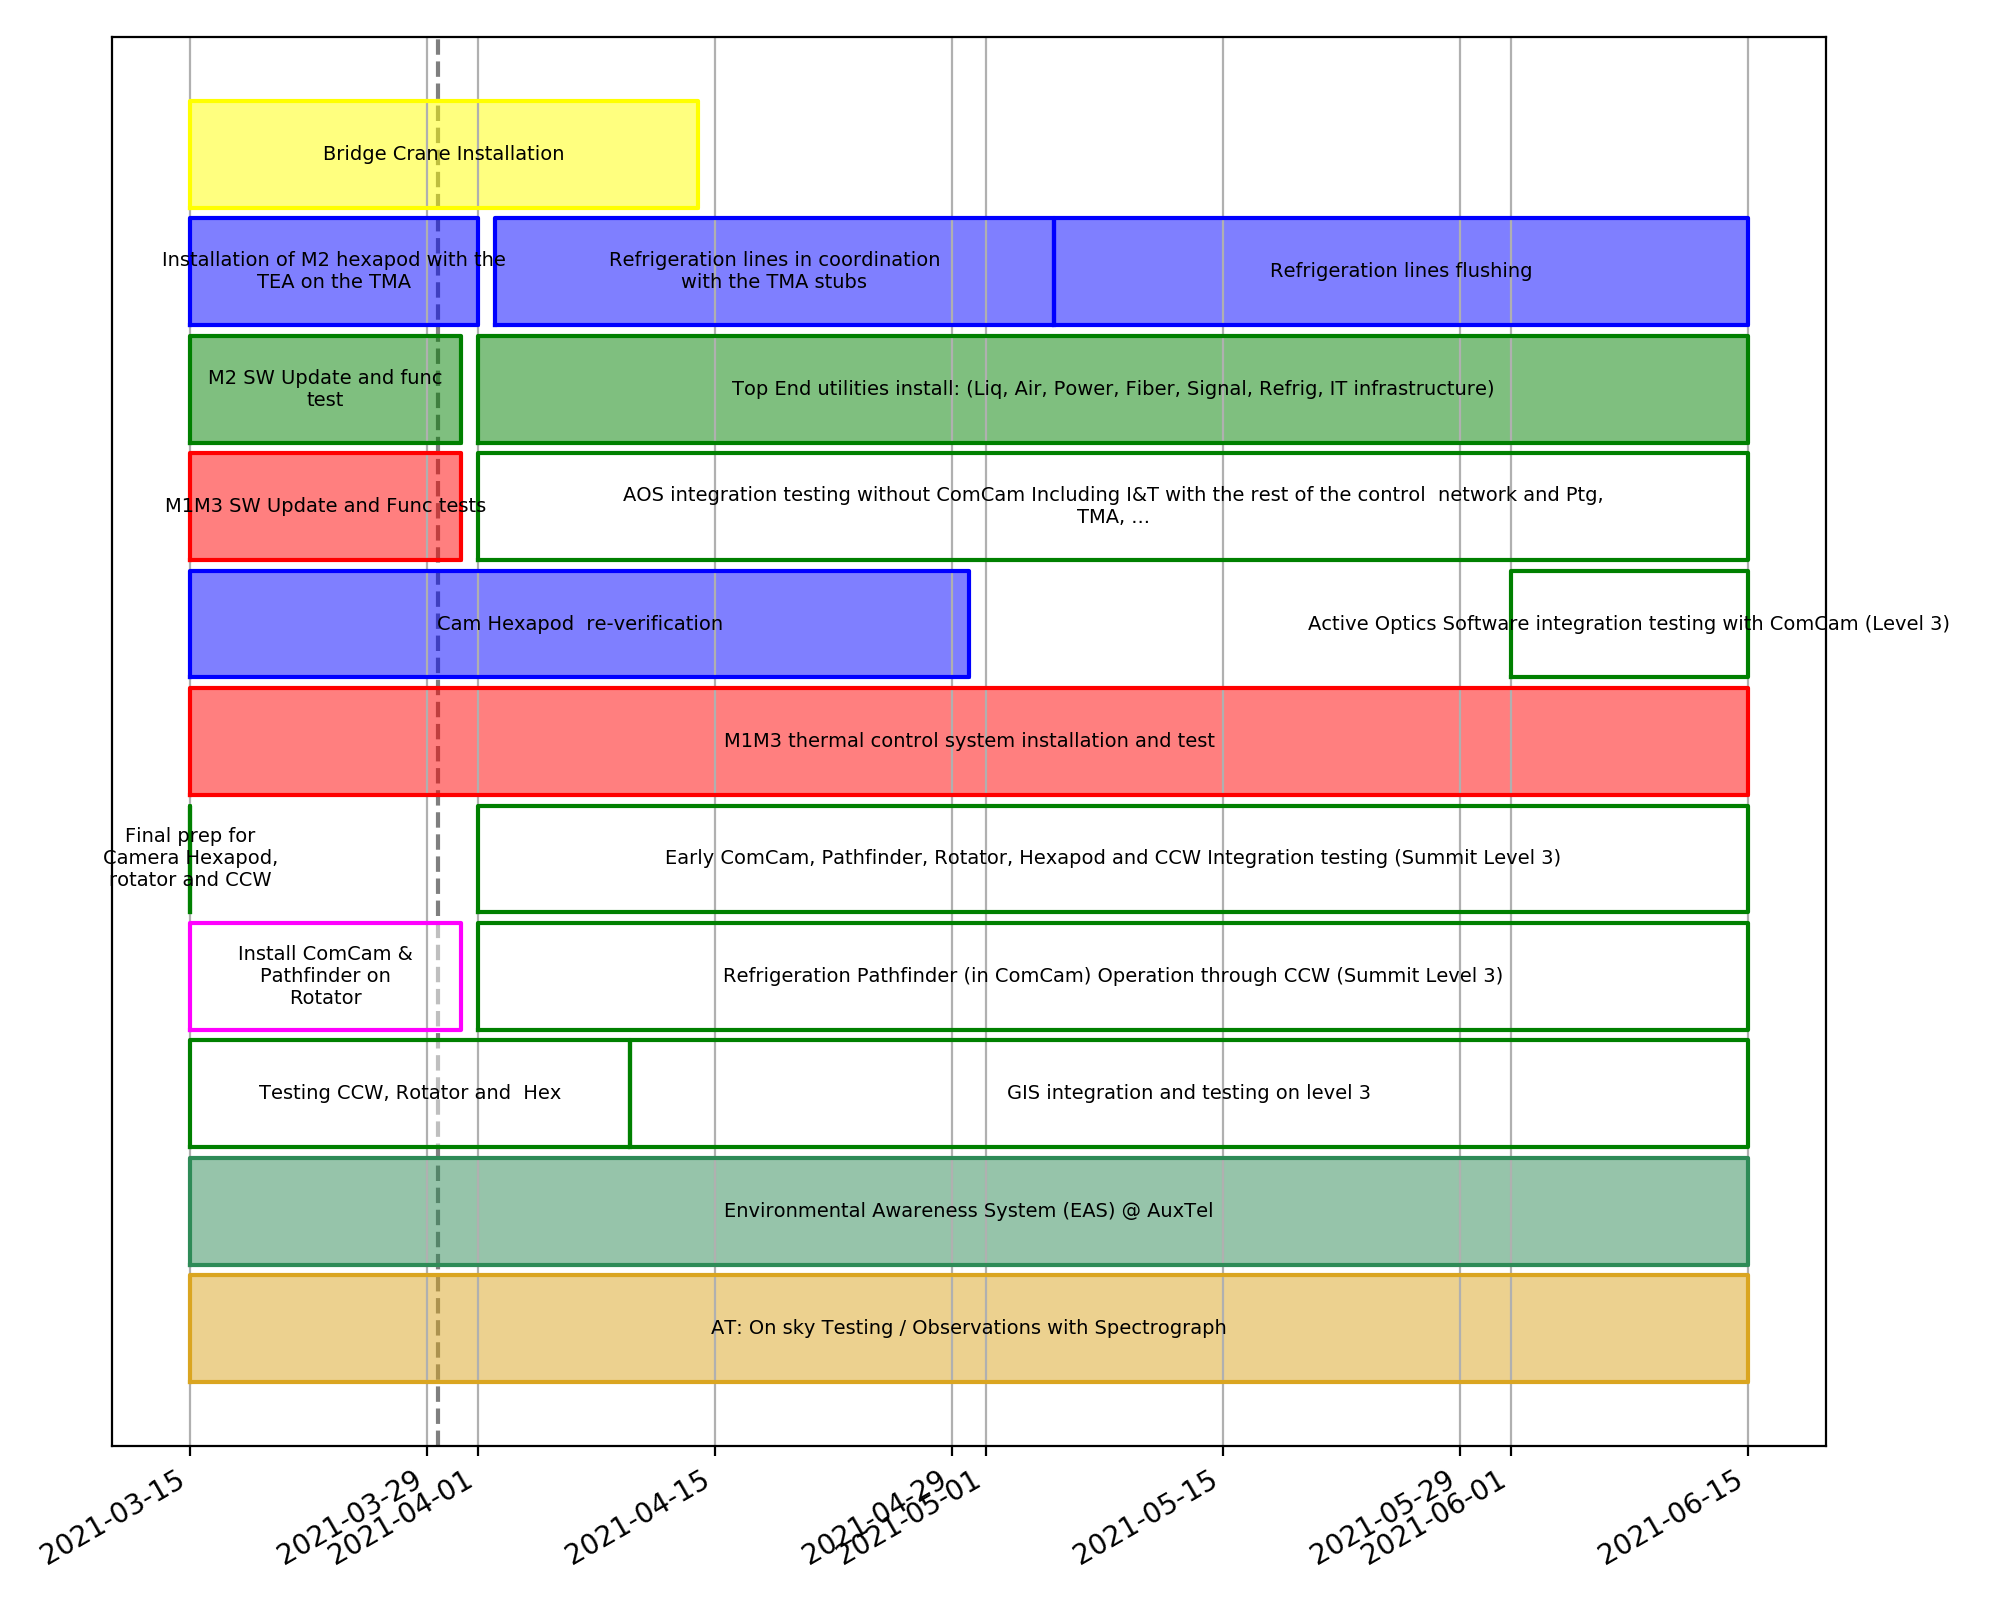

In [3]:
data = os.path.join(get_data_dir(), "data", "plans-2021-03-20.csv")
activities = read_activities(data)

fig = 1; plt.close(fig); fig = plt.figure(fig)

show_activities(activities[3:], startDate="2021-03-15", endDate="2021-06-15")

#### Add some "value added" data to a schedule

<IPython.core.display.Javascript object>


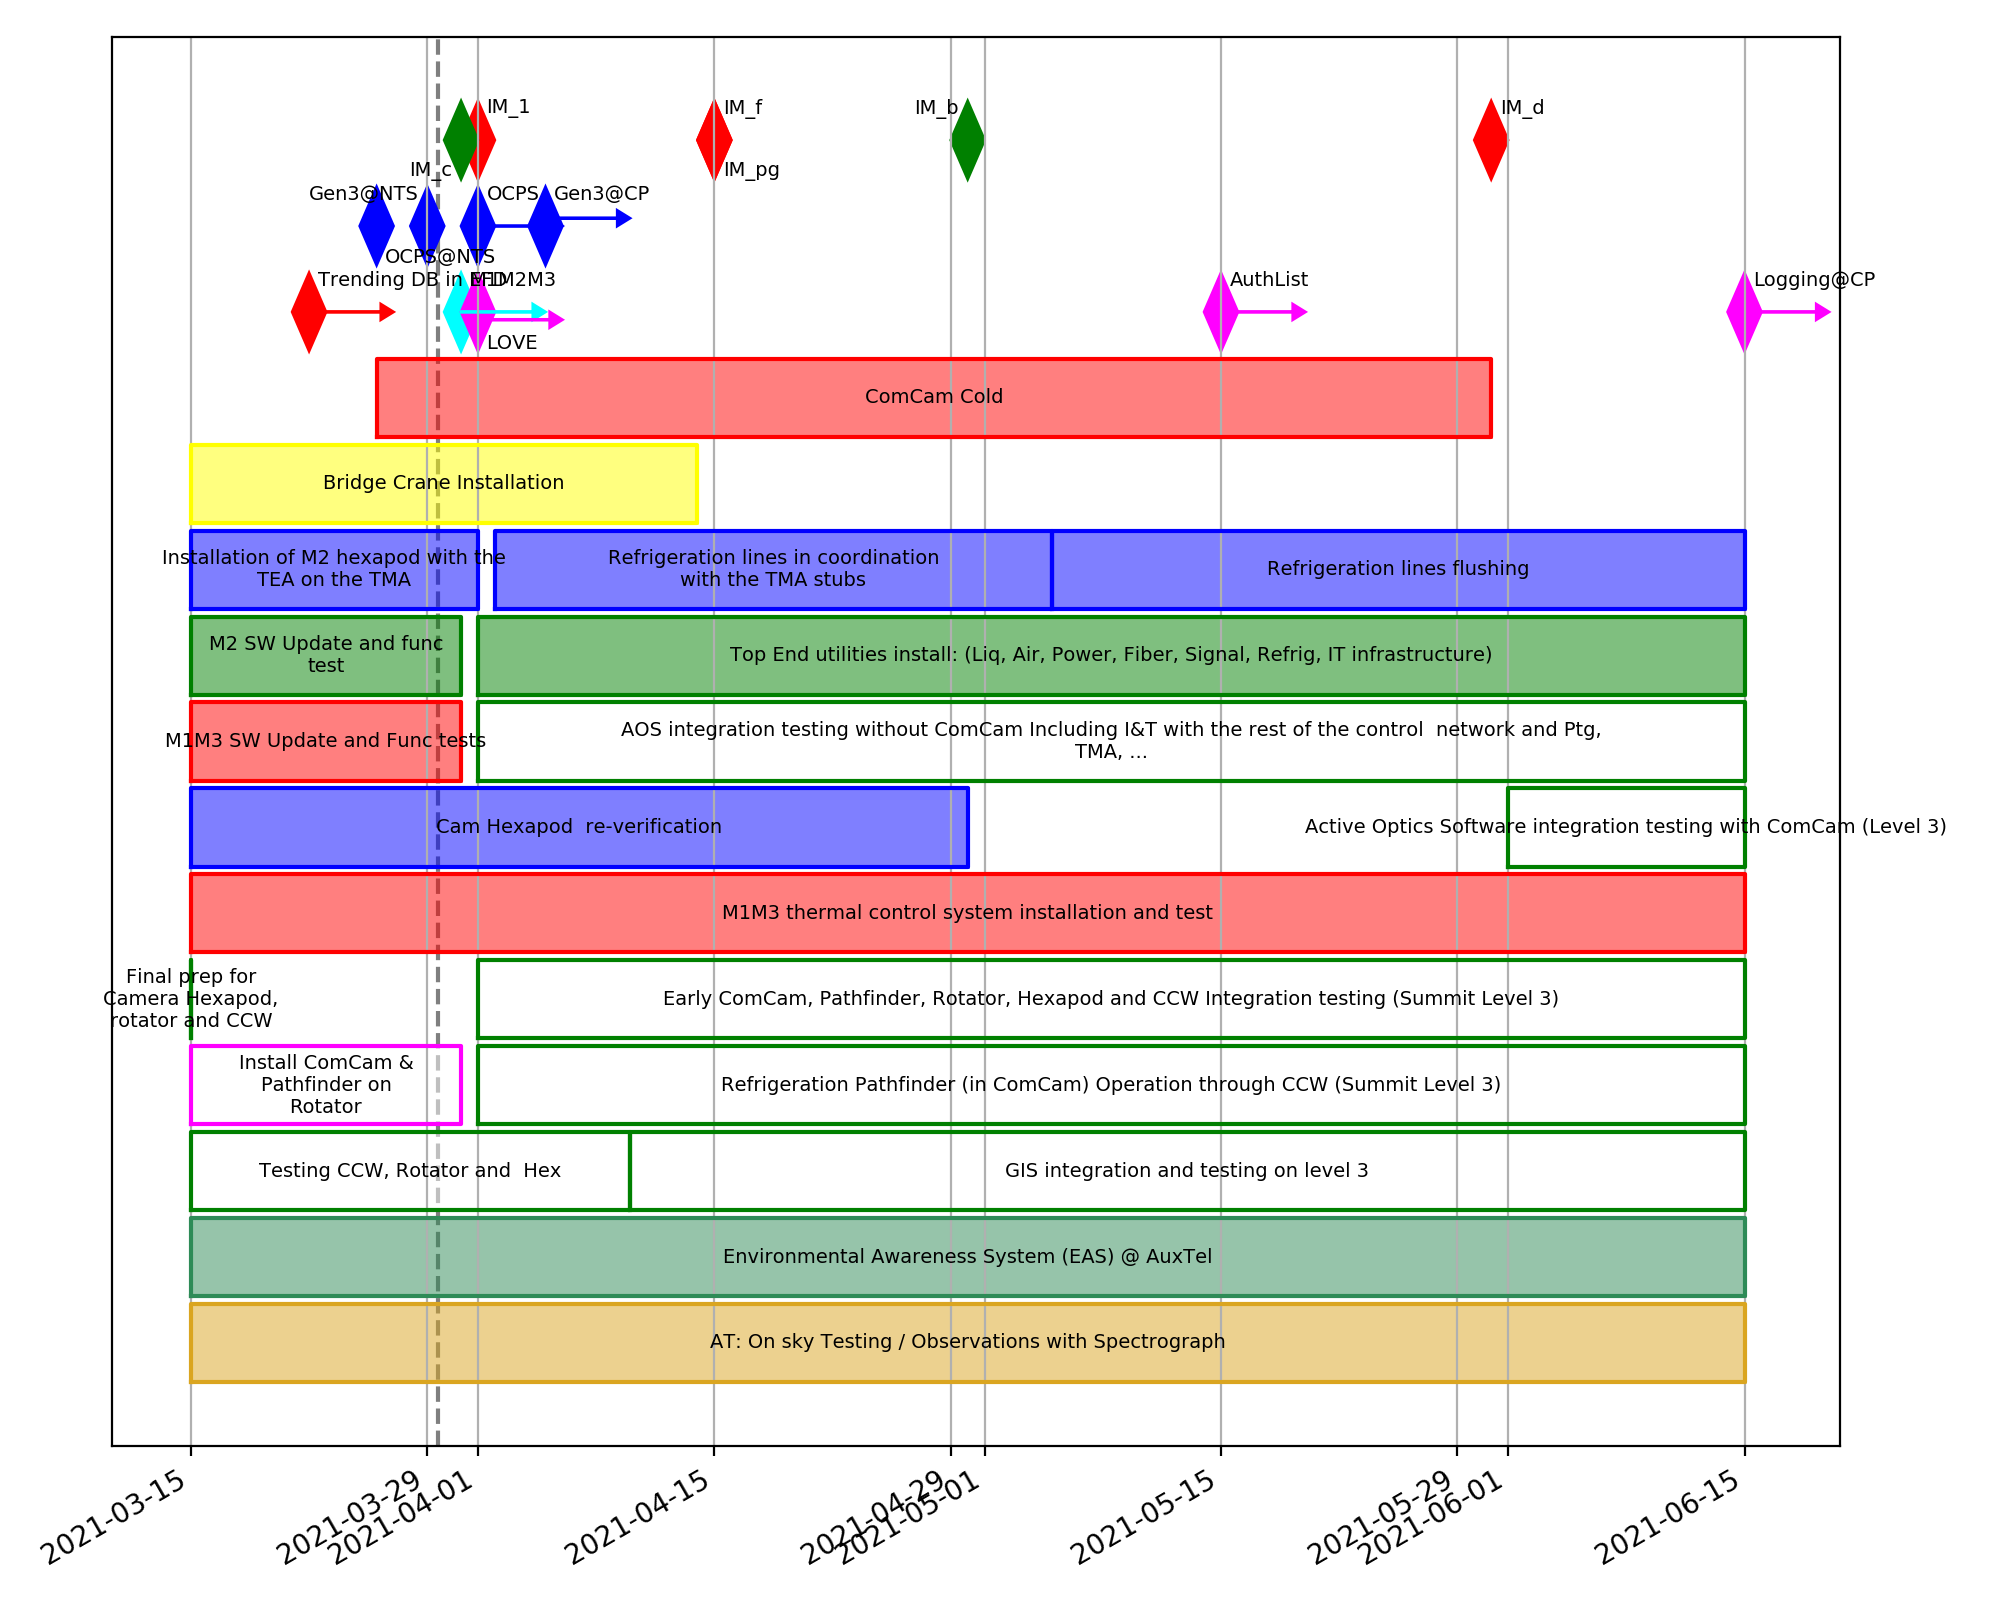

In [4]:
from lsst.timelines.activities import *
from lsst.timelines.planning import makeActivities, CCS, INRIA, TS

activities = makeActivities()
#
# Add in RHL items (equivalent to passing True to makeActivities)
#
activities[0:0] = [
        [
            Color("red"),
            MarkerWidth(1),

            Milestone("IM_1", "2021-04-01", color='red'),
            Milestone("IM_b", "2021-04-30", color='green', align='left'),
            Milestone("IM_c", "2021-03-31", color='green', align='left', valign='bottom'),
            Milestone("IM_d", "2021-05-31"),
            #Milestone("IM_e", "2021-05-31"),
            Milestone("IM_f", "2021-04-15"),
            Milestone("IM_pg", "2021-04-15", valign='bottom'),
            Milestone("IM_g", "2021-07-31"),
            Milestone("IM_h", "2021-09-30"),
        ],
        [
            Color("blue"),
            LengthArrow(5),

            Functionality("ScriptQueue", "2021-03-01"),

            Milestone("OCPS@NTS", "2021-03-26", align="right", valign="bottom"),
            Functionality("OCPS", "2021-04-01"),

            Milestone("Gen3@NTS", "2021-03-29", align="left", valign="top"),
            Functionality("Gen3@CP", "2021-04-05", dy=0.1),

            AdvanceRow(1),
            
            Color(TS),
            Functionality("M1M2M3", "2021-03-31"),
            Functionality("Slew TMA", "2021-10-01"),

            Color(CCS),
            Functionality("Trending DB in EFD", "2021-03-22"),

            Color(INRIA),
            Functionality("LOVE", "2021-04-01", valign="bottom", dy=-0.1),
            Functionality("AuthList", "2021-05-15"),
            Functionality("Logging@CP", "2021-06-15"),
        ], [
            Activity("ComCam Cold", "2021-03-26", "2021-05-31", color=CCS),
        ],
]

fig = 2; plt.close(fig); fig = plt.figure(fig)

show_activities(activities, startDate="2021-03-15", endDate="2021-06-15")

##### A simple self-contained example

Build and display a toy schedule, write/read it and save a pdf copy

<IPython.core.display.Javascript object>


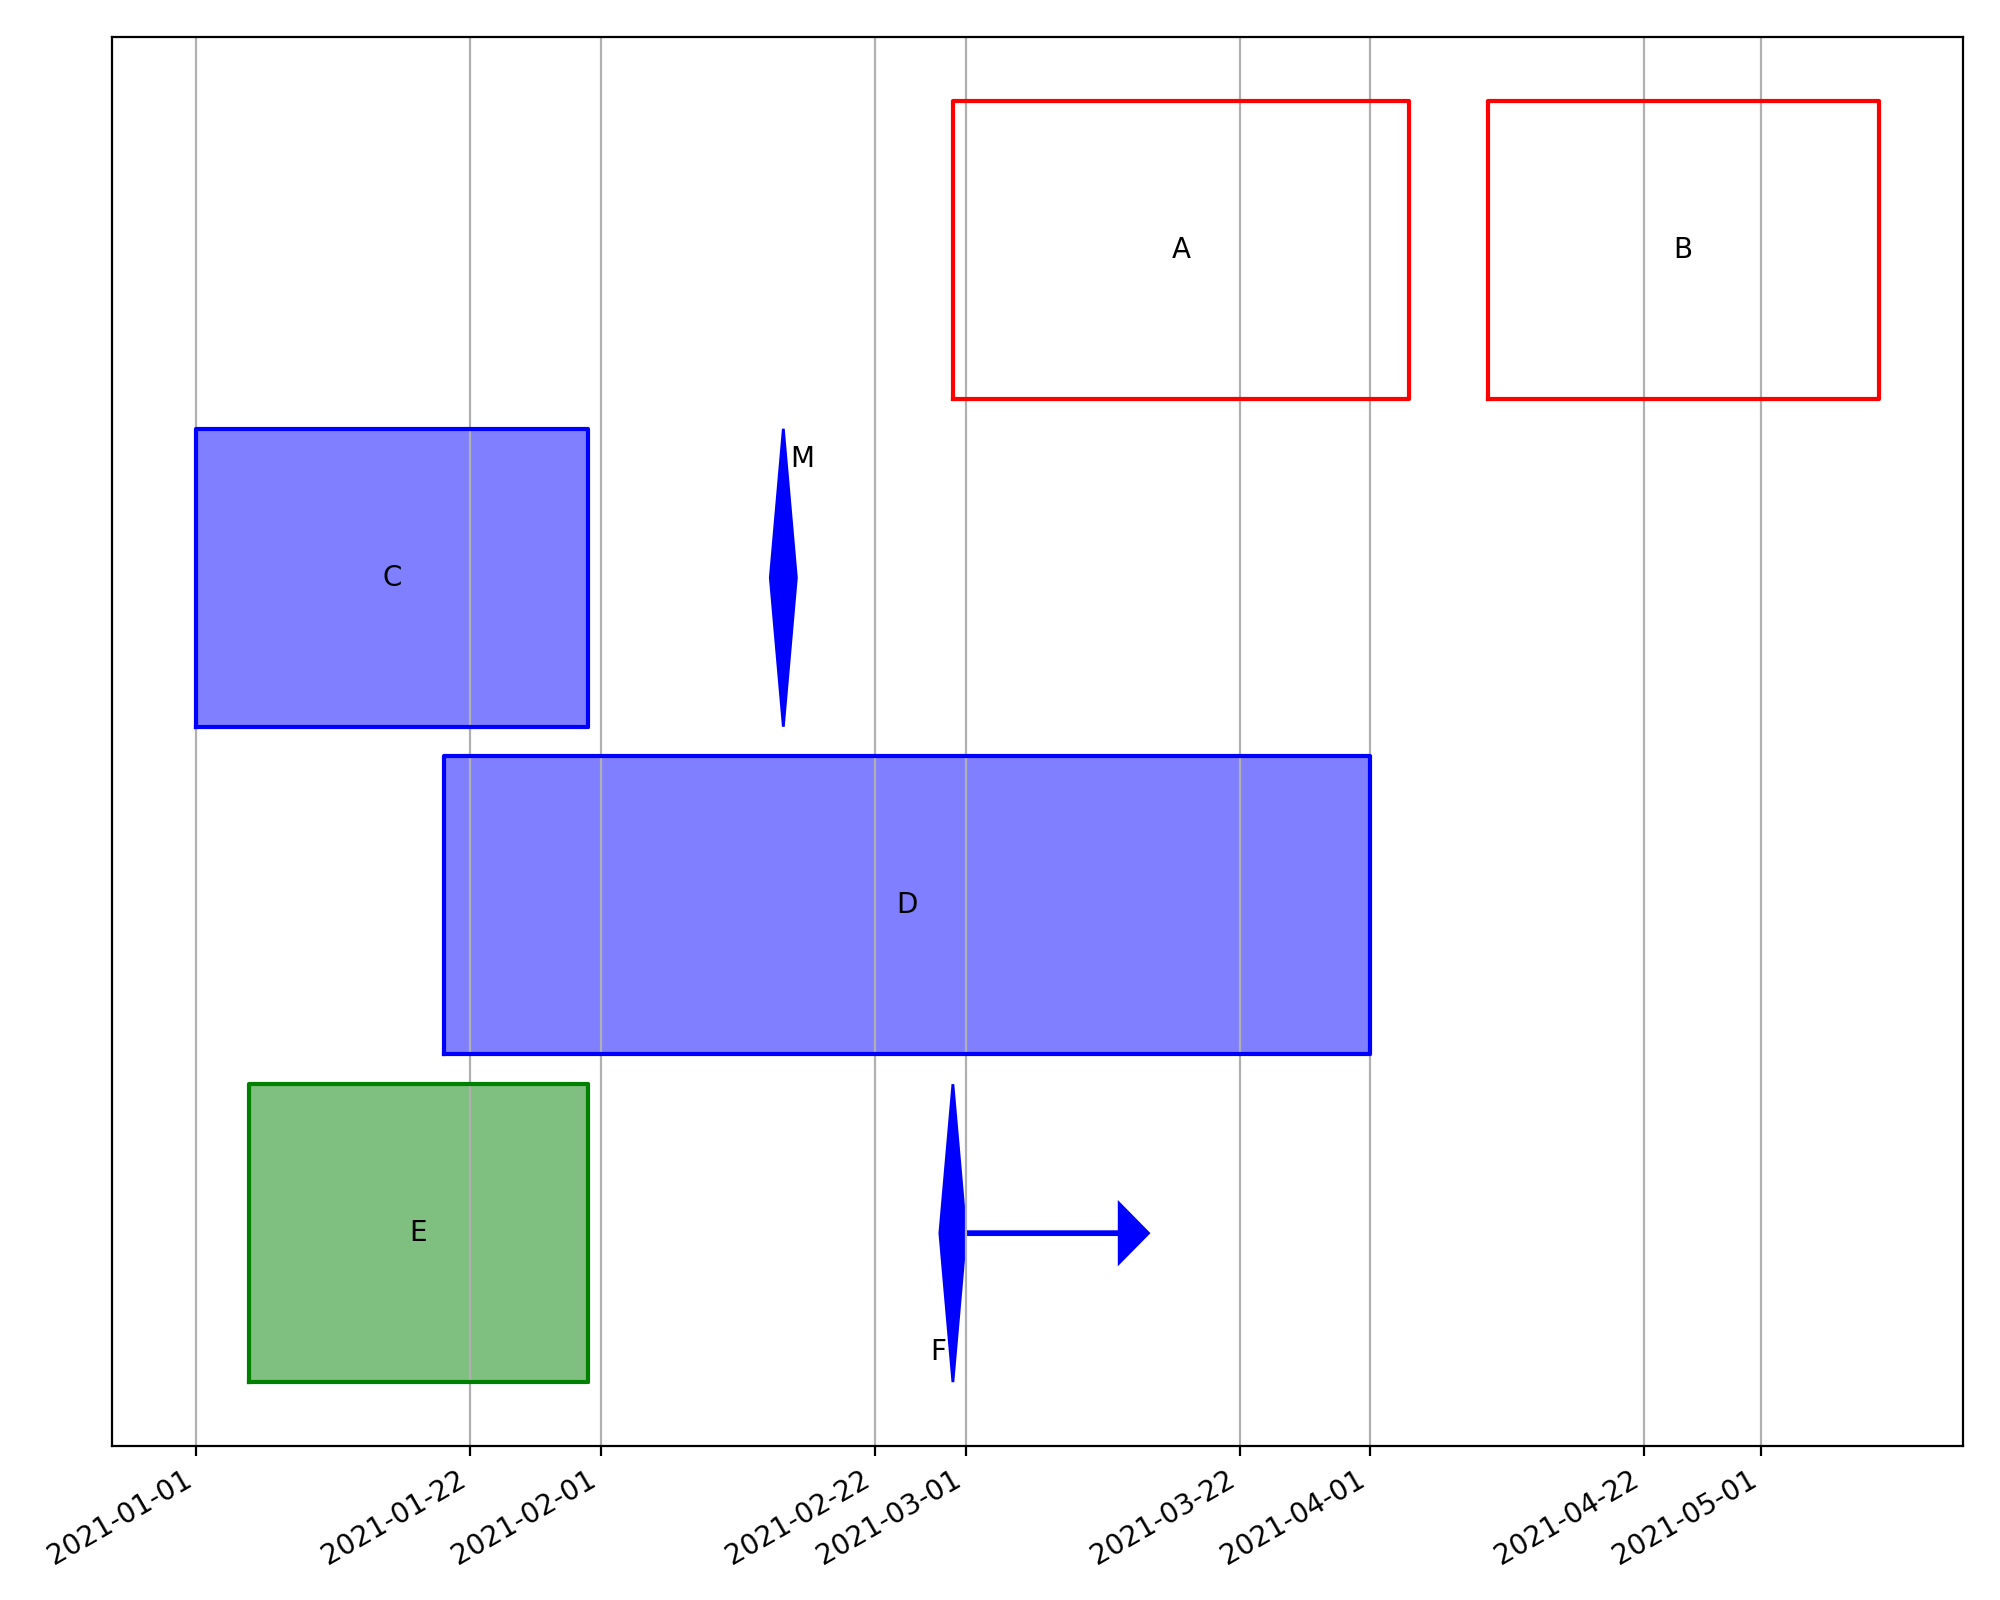

In [5]:
from lsst.timelines.activities import *

activities = [
    [
        LengthArrow(15),
        MarkerWidth(1),
    ],
    [
        Color("white", border='red'),
        Activity("A", "2021-02-28", 35),
        Activity("B", "2021-04-10", "2021-05-10")
    ], [
        Color("blue"),
        Activity("C", "2021-01-01", 30),
        Milestone("M", "2021-02-15"),

        AdvanceRow(1),
        Activity("D", "2021-01-20", "2021-04-01"), # could use drow=1 instead of AdvanceRow
    ], [
        Activity("E", "2021-01-05", "2021-01-31", color="green"),
        Functionality("F", "2021-02-28", color="green")
    ],
]

fig = 3; plt.close(fig); fig = plt.figure(fig)

# demonstrate round-tripping
outputFile = "activities.csv"
write_activities(activities, outputFile)
activities = read_activities(outputFile)

show_activities(activities, fontsize=None, show_today=False)

plt.savefig("plans.pdf")